In [ ]:
# Import necessary libraries
import numpy as np
from scipy.stats import norm
!pip install py_vollib
from py_vollib.black_scholes import black_scholes as bs
from py_vollib.black_scholes.greeks.analytical import delta, gamma, vega, theta, rho

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.7/144.7 kB 4.6 MB/s eta 0:00:00
  Created wheel for py_vollib: filename=py_vollib-1.0.1-py3-none-any.whl size=62832 sha256=b484221a62d893e0be6265d1059e1942c5b76d1501709e66389aef4d67340ff3
  Stored in directory: /root/.cache/pip/wheels/c0/5c/8f/1ed590a10a2cca3cbfa7a7caa29fb5d729b3e1f819bfda4b5e
  Created wheel for py_lets_be_rational: filename=py_lets_be_rational-1.0.1-py3-none-any.whl size=24450 sha256=8fd80a98ddd2d6457d24a9d4c6a5bcb44be42bbda417e11df31c69a06f0ac875
  Stored in directory: /root/.cache/pip/wheels/d9/20/b1/018f644bacb669d5cd6af600fe09ee0729ae5d75875a9f3043
Successfully built py_vollib py_lets_be_rational


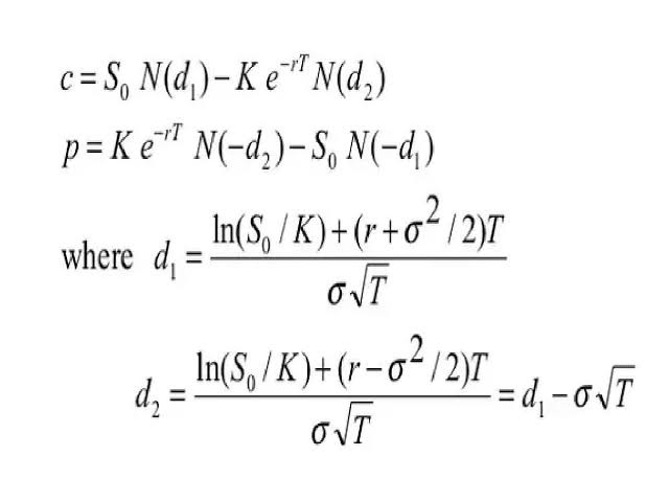

In [ ]:
# Define the Black-Scholes pricing function
def black_scholes_price(r, S, K, T, sigma, option_type="c"):
    """
    Calculate the Black-Scholes price for a call or put option.

    Parameters:
        r (float): Risk-free interest rate.
        S (float): Current stock price.
        K (float): Strike price of the option.
        T (float): Time to maturity (in years).
        sigma (float): Volatility of the underlying stock.
        option_type (str): Option type ('c' for call, 'p' for put).

    Returns:
        float: Option price calculated using the Black-Scholes formula.
    """
    # Calculate d1 and d2
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
     # Calculate option price
    if option_type == "c":
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == "p":
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'c' for call or 'p' for put.")

    return price

In [ ]:
# Example parameters
#kotak bank option chain price on 20th Jan, 2025
r = 0.07  # Risk-free rate
S = 1920    # Current stock price
K = 1960    # Strike price
T = 10/ 365  # Time to maturity in years
sigma = 0.24  # Volatility

# Calculate and print the Black-Scholes price
option_type = "c"  # Call option
price = black_scholes_price(r, S, K, T, sigma, option_type)
print(f"Black-Scholes Price ({'Call' if option_type == 'c' else 'Put'}): {price:.4f}")

Black-Scholes Price (Call): 15.9324


### Delta
Delta measures the rate of change of the theoretical option value with respect to changes in the underlying asset's price.

$\Delta = \frac{\partial V}{\partial S}$

$\Delta_{call} = \Phi(d1)$

$\Delta_{put} = -\Phi(-d1)$

### Vega
Vega measures sensitivity to volatility. Vega is the derivative of the option value with respect to the volatility of the underlying asset.

$\upsilon = \frac{\partial V}{\partial \sigma}$

$\upsilon = S\phi(d1)\sqrt{\tau}$

### Theta
Theta measures the sensitivity of the value of the derivative to the passage of time - time decay.

$\Theta = -\frac{\partial V}{\partial \tau}$

$\Theta_{call} = -\frac{S\phi(d1)\sigma}{2\tau} - rK\exp{(-rT)}\Phi(d2)$

$\Theta_{put} = -\frac{S\phi(d1)\sigma}{2\tau} + rK\exp{(-rT)}\Phi(-d2)$

### Rho
Rho measures the sensitivity to the interest rate.

$\rho = \frac{\partial V}{\partial r}$

$\rho_{call} = K\tau\exp{(-rT)}\Phi(d2)$

$\rho_{put} = -K\tau\exp{(-rT)}\Phi(-d2)$

### All together

In [ ]:
# Calculate Greeks using py_vollib
# Delta, Gamma, Vega, Theta, and Rho are calculated using the py_vollib.black_scholes.greeks.analytical module.

print("\nOption Greeks (using py_vollib):")
print(f"\nOption Greeks ({'Call' if option_type == 'c' else 'Put'}):")
print(f"Delta: {delta(option_type, S, K, T, r, sigma):.4f}")
print(f"Gamma: {gamma(option_type, S, K, T, r, sigma):.4f}")
print(f"Vega: {vega(option_type, S, K, T, r, sigma):.4f}")
print(f"Theta: {theta(option_type, S, K, T, r, sigma):.4f}")
print(f"Rho: {rho(option_type, S, K, T, r, sigma):.4f}")

# Note: To use this script, ensure that the 'py_vollib' library is installed.
# You can install it via pip: pip install py_vollib


Option Greeks (using py_vollib):

Option Greeks (Call):
Delta: 0.3260
Gamma: 0.0047
Vega: 1.1453
Theta: -1.4913
Rho: 0.1671
